<a href="https://www.kaggle.com/code/dishantkharkar/titanic-prediction-model?scriptVersionId=153332480" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import Dataset and Basic Checks

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [12]:
train['Age'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

# Data Preprocessing

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Null Value imputation

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Cabin


In [16]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)


In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Embarked 

In [18]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
train['Embarked'].fillna('S',inplace=True)

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [21]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

### Fare

In [22]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [23]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

### Age

In [24]:
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(), 177)

train_age

array([23, 31, 43, 35, 15, 33, 40, 25, 20, 23, 22, 33, 30, 19, 39, 32, 22,
       33, 27, 30, 30, 39, 24, 15, 33, 15, 30, 43, 30, 37, 16, 19, 38, 17,
       33, 21, 39, 19, 20, 27, 23, 33, 15, 32, 38, 29, 33, 32, 43, 22, 41,
       15, 23, 39, 28, 35, 38, 21, 38, 38, 18, 21, 36, 41, 33, 20, 23, 38,
       29, 15, 38, 42, 30, 30, 37, 35, 31, 25, 21, 35, 26, 40, 34, 27, 33,
       42, 19, 15, 18, 18, 28, 22, 33, 27, 23, 26, 18, 15, 15, 43, 22, 32,
       33, 30, 23, 30, 19, 31, 22, 40, 31, 17, 21, 43, 37, 36, 23, 25, 19,
       29, 43, 30, 34, 42, 37, 28, 42, 34, 17, 31, 25, 29, 20, 20, 17, 36,
       21, 36, 36, 34, 18, 41, 39, 30, 38, 40, 43, 34, 39, 30, 33, 32, 18,
       22, 38, 15, 37, 16, 24, 43, 41, 41, 27, 17, 27, 31, 17, 33, 42, 23,
       29, 32, 26, 29, 40, 30, 19])

In [25]:
test_age = np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean() + test['Age'].std(), 86)

test_age

array([18, 25, 25, 21, 17, 23, 34, 28, 36, 16, 39, 39, 22, 25, 35, 37, 41,
       25, 19, 20, 43, 40, 22, 29, 39, 24, 37, 33, 17, 16, 21, 39, 16, 16,
       42, 36, 17, 37, 25, 31, 43, 41, 28, 29, 24, 30, 26, 23, 16, 18, 28,
       16, 32, 40, 35, 40, 35, 41, 17, 34, 26, 29, 39, 21, 35, 28, 17, 37,
       39, 41, 37, 27, 27, 19, 23, 27, 38, 27, 33, 34, 36, 38, 30, 19, 16,
       16])

In [26]:
train['Age'][train['Age'].isnull()] = train_age

/tmp/ipykernel_19/1833702416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [27]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
test['Age'][test['Age'].isnull()] = test_age

/tmp/ipykernel_19/4013316382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


In [29]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
train.duplicated().sum()

0

# Exploratory Data Analysis

## Pclass

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
train    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [33]:
train[train['Pclass']==1]['Survived'].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [34]:
train[train['Pclass']==2]['Survived'].value_counts()

Survived
0    97
1    87
Name: count, dtype: int64

In [35]:
train[train['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [36]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Pclass', ylabel='Survived'>

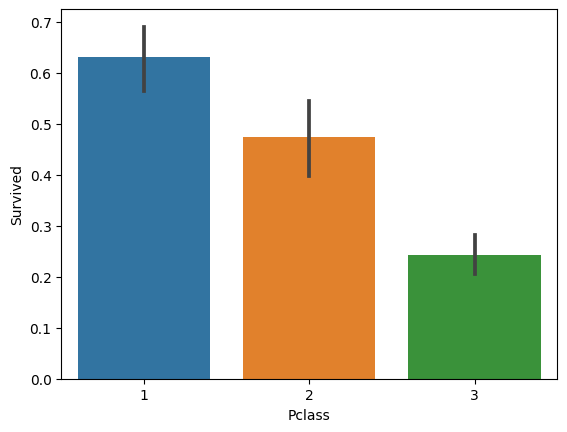

In [37]:
sns.barplot(train,x='Pclass',y='Survived')

## Sex

In [38]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex', ylabel='Survived'>

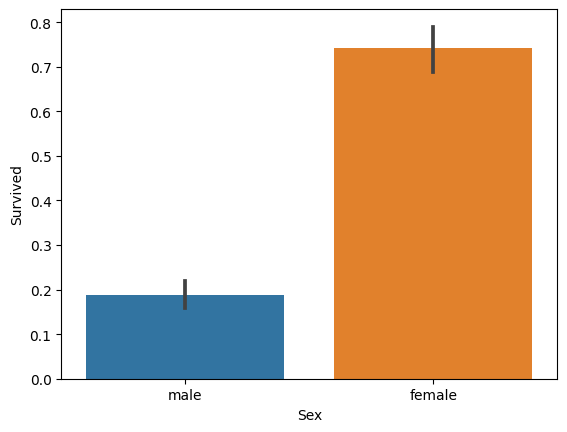

In [39]:
sns.barplot(train,x='Sex',y='Survived')

In [40]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Embarked

In [41]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

<Axes: xlabel='Embarked', ylabel='Survived'>

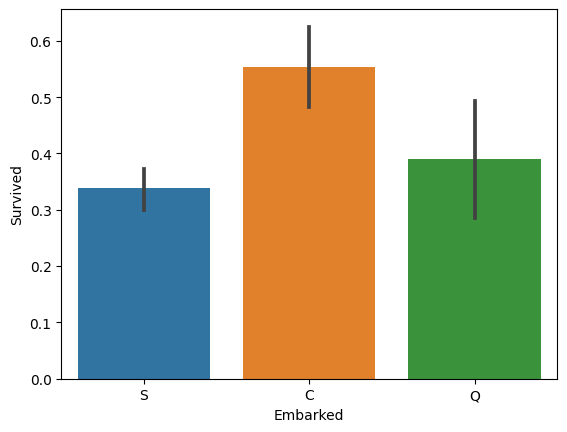

In [42]:
sns.barplot(train,x='Embarked',y='Survived')

In [43]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Age

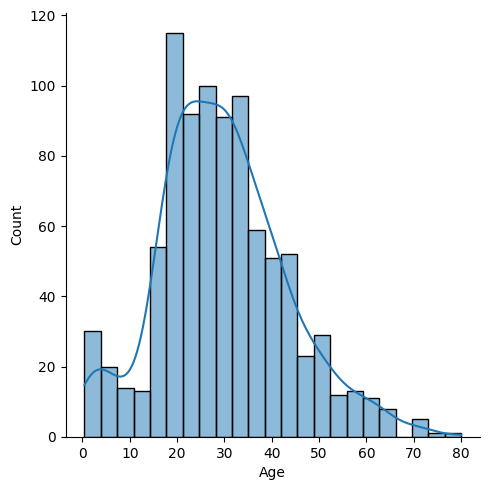

In [44]:
sns.displot(train['Age'],kde=True)

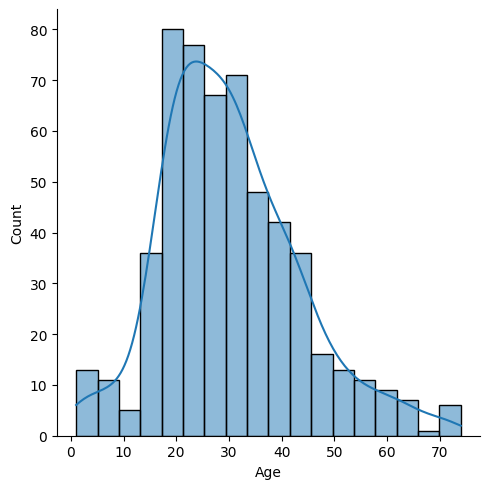

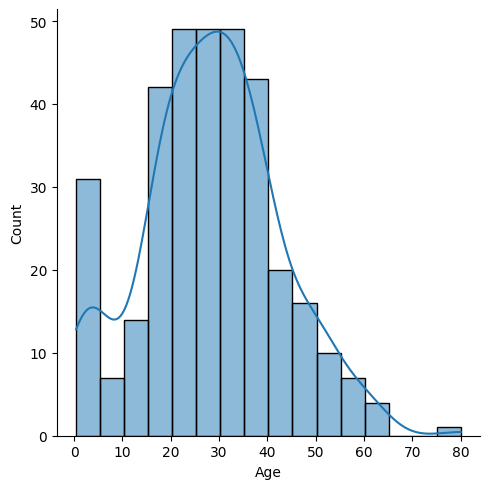

In [45]:
sns.displot(train['Age'][train['Survived']==0],kde=True)
sns.displot(train['Age'][train['Survived']==1],kde=True)

## Fare

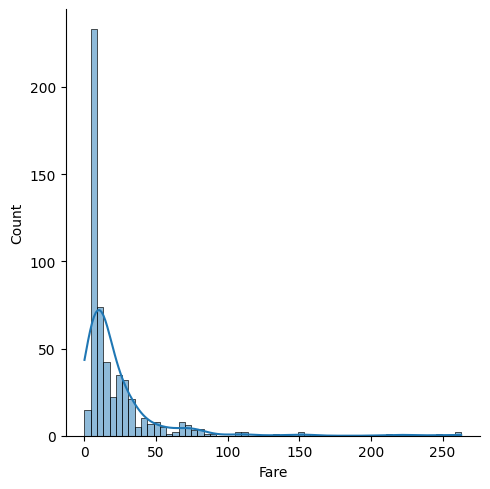

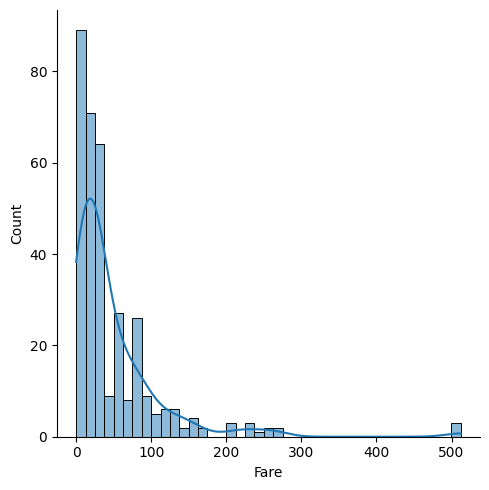

In [46]:
sns.displot(train['Fare'][train['Survived']==0],kde=True)
sns.displot(train['Fare'][train['Survived']==1],kde=True)

## Feature Engineering

## Ticket

In [47]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [49]:
# making new column Family
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [50]:
train['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [51]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

<Axes: xlabel='Family', ylabel='Survived'>

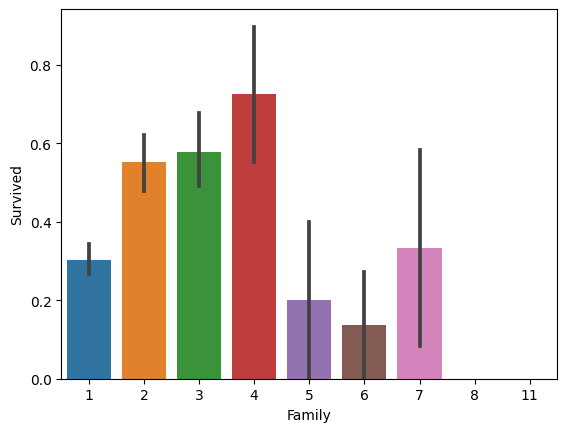

In [52]:
sns.barplot(train,x='Family',y='Survived')

In [53]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Family'],
      dtype='object')

In [54]:
train.drop(columns=['SibSp'],inplace=True)
test.drop(columns=['SibSp'],inplace=True)
train.drop(columns=['Parch'],inplace=True)
test.drop(columns=['Parch'],inplace=True)

In [55]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked', 'Family'],
      dtype='object')

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1


In [57]:
def cal(number):
    if number == 1:
        return 'Alone'
    elif number>1 and number<5:
        return 'Medium'
    else:
        return 'Large'
    

In [58]:
train['family_size'] = train['Family'].apply(cal)

In [59]:
test['family_size'] = test['Family'].apply(cal)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Alone


In [61]:
train.drop(columns=['Family'],inplace=True)

In [62]:
test.drop(columns=['Family'],inplace=True)

In [63]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,Medium


In [64]:
train.shape

(891, 9)

In [65]:
test.shape

(418, 8)

In [66]:
PassengerID = test['PassengerId'].values

In [67]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [68]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


# Feature Encoding

In [69]:
train = pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True,dtype=int)

In [70]:
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True,dtype=int)

In [71]:
train

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0
887,1,19.0,30.0000,0,0,0,0,1,0,0
888,0,19.0,23.4500,0,1,0,0,1,0,1
889,1,26.0,30.0000,0,0,1,0,0,0,0


In [72]:
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0000,0,1,0,0,1,0,1
2,62.0,9.6875,1,0,1,1,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0
4,22.0,12.2875,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,19.0,8.0500,0,1,1,0,1,0,0
414,39.0,108.9000,0,0,0,0,0,0,0
415,38.5,7.2500,0,1,1,0,1,0,0
416,16.0,8.0500,0,1,1,0,1,0,0


# Split Data Into X and y

In [73]:
x = train.drop('Survived',axis=1)
y = train[['Survived']]

In [74]:
x

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,22.0,7.2500,0,1,1,0,1,0,1
1,38.0,71.2833,0,0,0,0,0,0,1
2,26.0,7.9250,0,1,0,0,1,0,0
3,35.0,53.1000,0,0,0,0,1,0,1
4,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,0,1,0,1,0,0
887,19.0,30.0000,0,0,0,0,1,0,0
888,19.0,23.4500,0,1,0,0,1,0,1
889,26.0,30.0000,0,0,1,0,0,0,0


In [75]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [76]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature Selection

In [77]:
x_train.corr()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
Age,1.000000,0.089409,0.012473,-0.258971,0.071801,-0.039870,0.025324,-0.195010,-0.078161
Fare,0.089409,1.000000,-0.113373,-0.390559,-0.167973,-0.114615,-0.115588,0.145194,0.174864
Pclass_2,0.012473,-0.113373,1.000000,-0.590926,-0.032047,-0.133653,0.159878,-0.116357,0.079961
Pclass_3,-0.258971,-0.390559,-0.590926,1.000000,0.118404,0.238799,-0.027690,0.173457,-0.198637
Sex_male,0.071801,-0.167973,-0.032047,0.118404,1.000000,-0.061973,0.111870,-0.094112,-0.237024
Embarked_Q,-0.039870,-0.114615,-0.133653,0.238799,-0.061973,1.000000,-0.518439,-0.001320,-0.073426
Embarked_S,0.025324,-0.115588,0.159878,-0.027690,0.111870,-0.518439,1.000000,0.113830,-0.067403
family_size_Large,-0.195010,0.145194,-0.116357,0.173457,-0.094112,-0.001320,0.113830,1.000000,-0.197733
family_size_Medium,-0.078161,0.174864,0.079961,-0.198637,-0.237024,-0.073426,-0.067403,-0.197733,1.000000


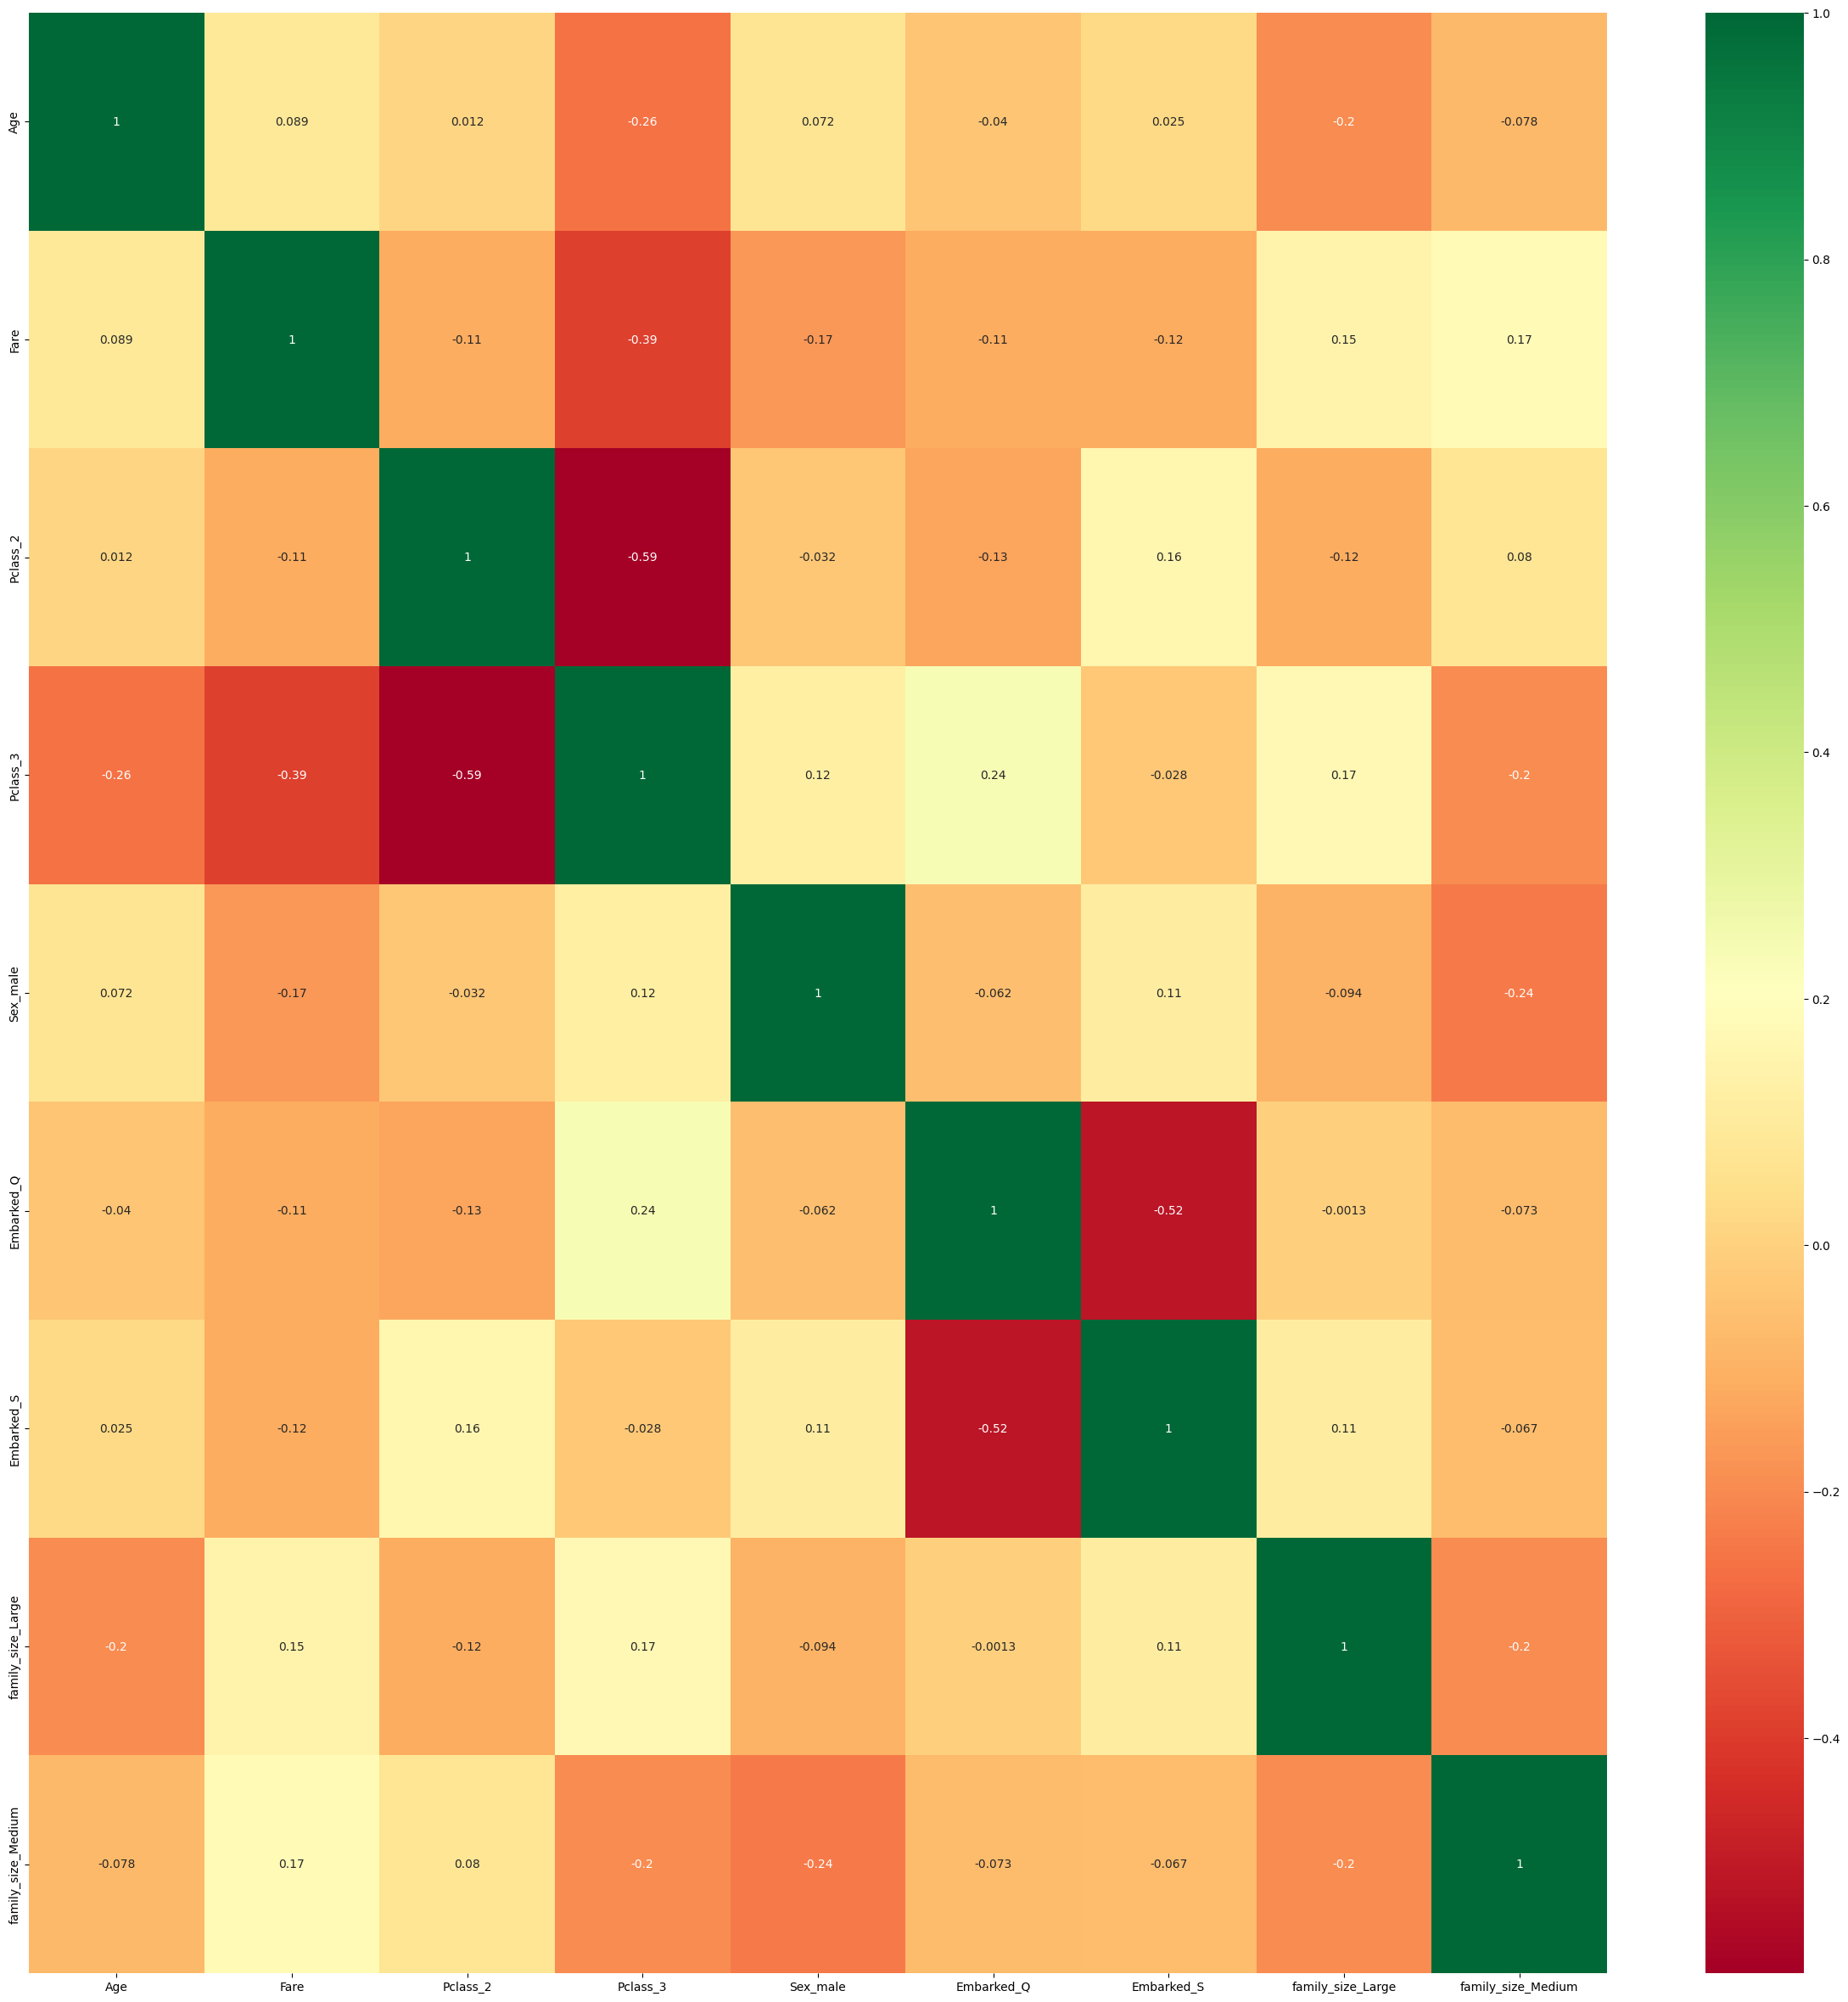

In [78]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [79]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

0

# Model Building

## Model Camparision

In [81]:
# Modelling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return accuracy, precision, recall, f1

# Define your classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Support Vector Classifier": SVC()
}

# Sample dataset split into features (X) and labels (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Iterate through the models and train/evaluate them
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    accuracy_train, precision_train, recall_train, f1_train = evaluate_model(y_train, y_train_pred)
    accuracy_test, precision_test, recall_test, f1_test = evaluate_model(y_test, y_test_pred)

    print(model_name)
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- Precision: {:.4f}".format(precision_train))
    print("- Recall: {:.4f}".format(recall_train))
    print("- F1 Score: {:.4f}".format(f1_train))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))
    print("- F1 Score: {:.4f}".format(f1_test))
    print('=' * 35)
    print('\n')

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

Logistic Regression
Model performance for Training set
- Accuracy: 0.8132
- Precision: 0.7897
- Recall: 0.6866
- F1 Score: 0.7345
----------------------------------
Model performance for Test set
- Accuracy: 0.8045
- Precision: 0.7910
- Recall: 0.7162
- F1 Score: 0.7518


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8034
- Precision: 0.7712
- Recall: 0.6791
- F1 Score: 0.7222
----------------------------------
Model performance for Test set
- Accuracy: 0.6592
- Precision: 0.6182
- Recall: 0.4595
- F1 Score: 0.5271


Decision Tree Classifier
Model performance for Training set
- Accuracy: 0.9874
- Precision: 1.0000
- Recall: 0.9664
- F1 Score: 0.9829
----------------------------------
Model performance for Test set
- Accuracy: 0.7709
- Precision: 0.7089
- Recall: 0.7568
- F1 Score: 0.7320




/tmp/ipykernel_19/2707798994.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)  # Train model


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9874
- Precision: 0.9962
- Recall: 0.9701
- F1 Score: 0.9830
----------------------------------
Model performance for Test set
- Accuracy: 0.8045
- Precision: 0.7826
- Recall: 0.7297
- F1 Score: 0.7552


XGBClassifier
Model performance for Training set
- Accuracy: 0.9719
- Precision: 0.9806
- Recall: 0.9440
- F1 Score: 0.9620
----------------------------------
Model performance for Test set
- Accuracy: 0.8156
- Precision: 0.7733
- Recall: 0.7838
- F1 Score: 0.7785


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9017
- Precision: 0.9459
- Recall: 0.7836
- F1 Score: 0.8571
----------------------------------
Model performance for Test set
- Accuracy: 0.8101
- Precision: 0.8125
- Recall: 0.7027
- F1 Score: 0.7536


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8357
- Precision: 0.7961
- Recall: 0.7575
- F1 Score: 0.7763
----------------------------------
Model performa

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.6671
- Precision: 0.6566
- Recall: 0.2425
- F1 Score: 0.3542
----------------------------------
Model performance for Test set
- Accuracy: 0.6536
- Precision: 0.7500
- Recall: 0.2432
- F1 Score: 0.3673




# Decision tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
decision = DecisionTreeClassifier()

In [84]:
decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred = decision.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.7821229050279329

# Random Forest Algorithm

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(x_train,y_train)
yhat = clf_forest.predict(x_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.8268156424581006


/tmp/ipykernel_19/805190186.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_forest.fit(x_train,y_train)


# Support Vector Machine

In [89]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(x_train,y_train)
yhat = clf_svm.predict(x_test)
clf_SVM = SVC(gamma='auto')
clf_SVM.fit(x,y)
pred_svm = clf_SVM.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
pred_svm

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1])

In [91]:
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.6927374301675978


In [92]:
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0000,0,1,0,0,1,0,1
2,62.0,9.6875,1,0,1,1,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0
4,22.0,12.2875,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,19.0,8.0500,0,1,1,0,1,0,0
414,39.0,108.9000,0,0,0,0,0,0,0
415,38.5,7.2500,0,1,1,0,1,0,0
416,16.0,8.0500,0,1,1,0,1,0,0


In [93]:
xf = test.iloc[:,:].values

In [94]:
xf

array([[34.5   ,  7.8292,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [47.    ,  7.    ,  0.    , ...,  1.    ,  0.    ,  1.    ],
       [62.    ,  9.6875,  1.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [38.5   ,  7.25  ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       [16.    ,  8.05  ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       [16.    , 22.3583,  0.    , ...,  0.    ,  0.    ,  1.    ]])

In [95]:
y_final = clf_forest.predict(xf)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [96]:
y_final.shape

(418,)

In [97]:
PassengerID.shape

(418,)

In [98]:
final = pd.DataFrame()

In [99]:
final['PassengerID'] = PassengerID
final['Survived'] = y_final

In [100]:
final

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [101]:
final.to_csv('submission.csv',index=False)